In [332]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

mlhundredk = True


if mlhundredk: 
    directory = 'ml-100k'
    ratings = pd.read_csv(os.path.join(directory, 'u.data'), sep='\t', names=['userId', 'movieId', 'rating', 'timestamp'])
    rating = ratings.rename(columns={'user_id': 'userId', 'item_id': 'itemId'})
    movies = pd.read_csv(os.path.join(directory, 'u.item'), sep='|', encoding='latin-1', names=[
        'movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 
        'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
        'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
    ])
    # remove columns release_date, video_release_date, IMDb_URL
    movies = movies.drop(columns=['release_date', 'video_release_date', 'IMDb_URL'])
    # rename unknown to (no genres listed)
    movies = movies.rename(columns={'unknown': '(no genres listed)', "Children's": 'Children', "movie_id": 'movieId', "movie_title": 'title'})

    # create a column genres that contains all genres
    movies['genres'] = movies.iloc[:, 2:].apply(lambda x: '|'.join(x.index[x == 1]), axis=1)

    columns = list(movies.columns)
    new_order = ['movieId', 'title', 'genres', '(no genres listed)'] + [col for col in columns if col not in ['movieId', 'title', 'genres', '(no genres listed)']]
    movies = movies[new_order]
else: 
    directory = 'ml-latest-small'
    ratings = pd.read_csv(os.path.join(directory, 'ratings.csv'))
    movies = pd.read_csv(os.path.join(directory, 'movies.csv'))
    movies = pd.concat([movies, movies['genres'].str.get_dummies(sep='|')], axis=1) 
    # movies = movies.drop(columns=['genres'])

movies

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children|Comedy,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),Action|Adventure|Thriller,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),Action|Comedy|Drama,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),Crime|Drama|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),Romance|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [333]:
ratings

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


Drama                 725
Comedy                505
Action                251
Thriller              251
Romance               247
Adventure             135
Children              122
Crime                 109
Sci-Fi                101
Horror                 92
War                    71
Mystery                61
Musical                56
Documentary            50
Animation              42
Western                27
Film-Noir              24
Fantasy                22
(no genres listed)      2
dtype: int64


Text(0.5, 0, 'Number of items')

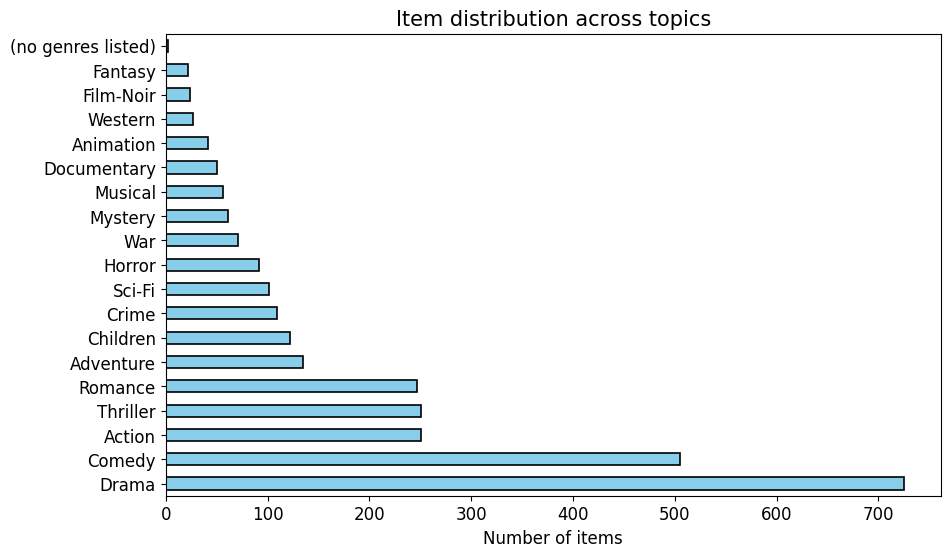

In [334]:
# count for each genre the number of occurrences
genre_count = movies.iloc[:, 3:].sum().sort_values(ascending=False)
print(genre_count)

# plot the number of occurrences for each genre
genre_count.plot(kind='barh', figsize=(10, 6), fontsize=12, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Item distribution across topics', fontsize=15)
plt.xlabel("Number of items", fontsize=12)

Text(0.5, 0, 'Number of occurences')

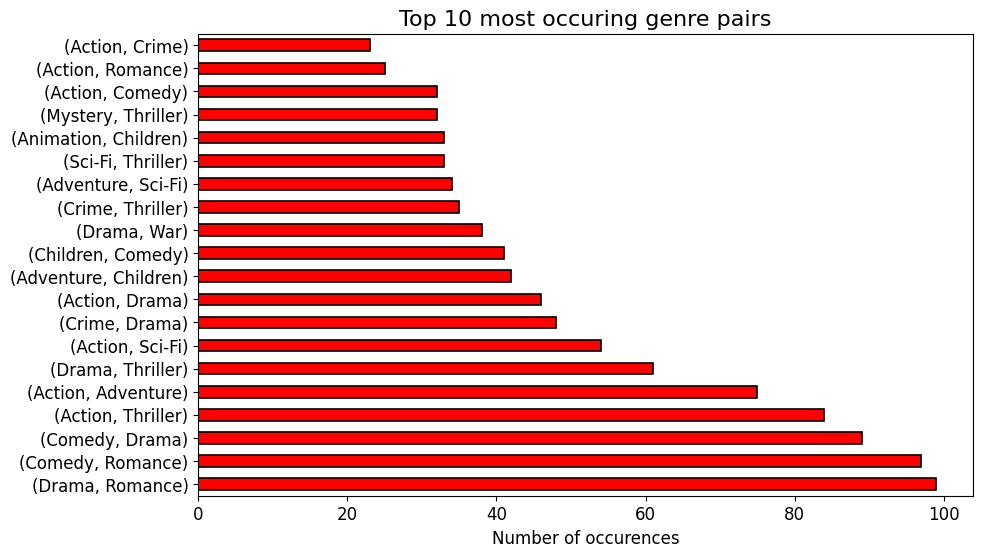

In [335]:
# plot the most occuring genre pairs
genre_pairs = movies.iloc[:, 3:].T.dot(movies.iloc[:, 3:])
# set pairs where the same genre is counted as 0
np.fill_diagonal(genre_pairs.values, 0)

# find the most occuring genre pairs
genre_pairs = genre_pairs.unstack().sort_values(ascending=False)

# remove the duplicates
genre_pairs = genre_pairs[genre_pairs.index.get_level_values(0) < genre_pairs.index.get_level_values(1)]

# remove pairs with 0 occurrences
genre_pairs = genre_pairs[genre_pairs > 0]


# plot the top 10 most occuring genre pairs as horizontal bar plot
genre_pairs.head(20).plot(kind='barh', figsize=(10, 6), fontsize=12, color='red', edgecolor='black', linewidth=1.2)
# plot title
plt.title('Top 10 most occuring genre pairs', fontsize=16)
plt.xlabel("Number of occurences", fontsize=12)

<Figure size 1000x600 with 0 Axes>

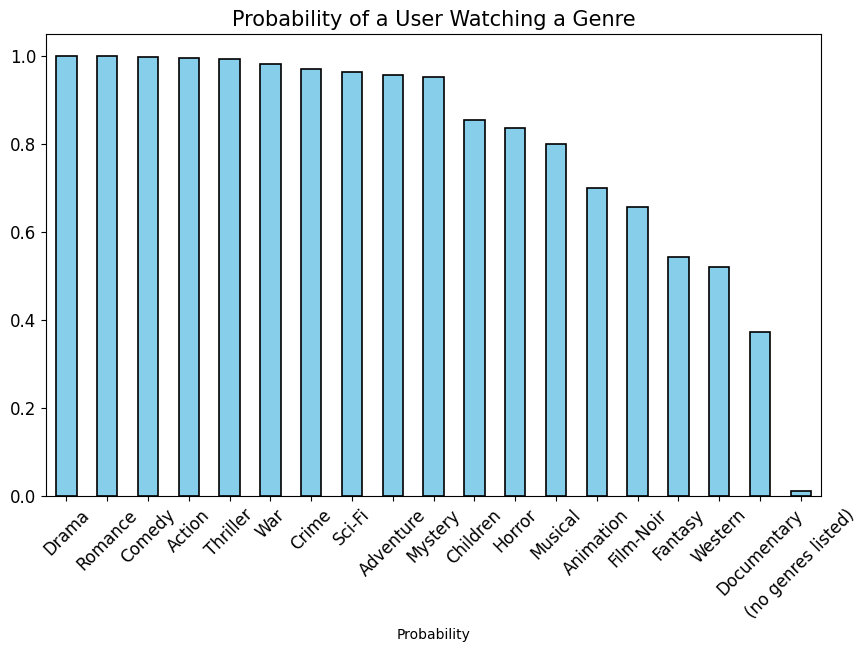

In [336]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Initialize a dictionary to store genre counts per user
user_genre_count = defaultdict(set)

# Load the data in chunks
chunksize = 1e6  # Adjust the chunksize based on your memory capacity

if mlhundredk:
    filename1 = 'u.data'
    filename2 = 'u.item'
else:
    filename1 = 'ratings.csv'
    filename2 = 'movies.csv'

for chunk in pd.read_csv(os.path.join(directory, filename1), sep='\t', names=['userId', 'movieId', 'rating', 'timestamp'], chunksize=chunksize):
    # Merge each chunk with the movies data
    chunk = chunk.rename(columns={'user_id': 'userId', 'item_id': 'itemId'})

    chunk = pd.merge(chunk, movies, on='movieId')
    
    # Split genres into individual columns
    chunk = chunk.assign(genres=chunk['genres'].str.split('|'))
    
    # Explode the genres into separate rows
    chunk = chunk.explode('genres')
    
    # Count unique genres per user
    for row in chunk.itertuples():
        user_genre_count[row.userId].add(row.genres)

# Convert the dictionary to a DataFrame
genre_user_count = defaultdict(int)
for genres in user_genre_count.values():
    for genre in genres:
        genre_user_count[genre] += 1

# Create a DataFrame for plotting
genre_count_df = pd.DataFrame(list(genre_user_count.items()), columns=['Genre', 'UserCount']).sort_values(by='UserCount', ascending=False)
genre_count_df["UserCount"] = genre_count_df["UserCount"]/len(user_genre_count)
# Plot the result. Do not plot legenda as it is not useful in this case
plt.figure(figsize=(10, 6))
genre_count_df.plot(kind='bar', x='Genre', y='UserCount', figsize=(10, 6), fontsize=12, color='skyblue', edgecolor='black', linewidth=1.2, legend=False)
plt.xlabel('Probability')
plt.xticks(rotation=45)
plt.title('Probability of a User Watching a Genre', fontsize=15)
plt.show()

# Defining a User Embedding $e_u$

Define user embedding $e_i$ based on prior distribution $p_{\tau}$.

In [337]:
movie_ratings.head()

,userId,movieId,rating,timestamp,title,(no genres listed),Action,Adventure,Animation,Children,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genres,like
0,196,242,3,881250949,Kolya (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,Comedy,False
1,186,302,3,891717742,L.A. Confidential (1997),0,0,0,0,0,...,0,0,1,0,0,1,0,0,Crime,False
1,186,302,3,891717742,L.A. Confidential (1997),0,0,0,0,0,...,0,0,1,0,0,1,0,0,Film-Noir,False
1,186,302,3,891717742,L.A. Confidential (1997),0,0,0,0,0,...,0,0,1,0,0,1,0,0,Mystery,False
1,186,302,3,891717742,L.A. Confidential (1997),0,0,0,0,0,...,0,0,1,0,0,1,0,0,Thriller,False


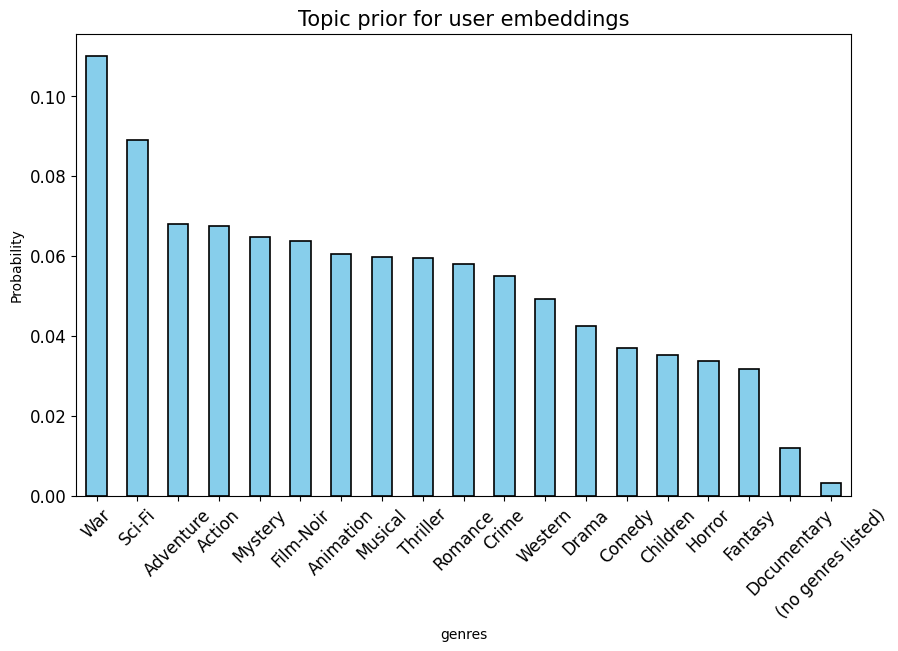

In [338]:
movie_ratings = pd.merge(ratings, movies, on='movieId')

# Split genres into individual columns
movie_ratings = movie_ratings.assign(genres=movie_ratings['genres'].str.split('|'))

# Explode the genres into separate rows
movie_ratings = movie_ratings.explode('genres')

movie_ratings

# per movie, count the number of likes, i.e. ratings >= 4
movie_ratings['like'] = movie_ratings['rating'] >= 4

# group by movie and genre and count the number of likes
genre_likes = movie_ratings.groupby(['movieId', 'genres'])['like'].sum()

# calculate the average number of likes per genre

genre_likes = genre_likes.groupby('genres').mean().sort_values(ascending=False)

# Divide the average number of likes by the total number of likes
genre_likes = genre_likes/genre_likes.sum()

# Plot the result
genre_likes.plot(kind='bar', figsize=(10, 6), fontsize=12, color='skyblue', edgecolor='black', linewidth=1.2)
plt.ylabel('Probability')
plt.title('Topic prior for user embeddings', fontsize=15)
plt.xticks(rotation=45)
plt.show()


On average, IMAX movies are liked more compared to other movies of other genres. 

In [339]:
priors = np.array(list(genre_likes))

# save the priors to a npz file
np.savez_compressed(os.path.join("embeddings",f'{directory}_priors.npz'), priors=priors)

In [340]:
def normalize_to_unit_euclidean_norm(e_i):
    """
    Normalizes the input vector to have a unit Euclidean norm.
    
    Parameters:
    e_i (array-like): The input vector to be normalized.
    
    Returns:
    np.ndarray: The normalized vector with a unit Euclidean norm.
    """
    e_i = np.array(e_i)
    norm = np.linalg.norm(e_i)
    if norm == 0:
        return e_i 
    normalized_e_i = e_i / norm
    return normalized_e_i

class User:
    def __init__(self, priors):
        def generate_user_embedding(priors):
            # Normalize priors to sum to 1
            priors = np.array(priors)
            priors /= priors.sum()

            # Sample 6 to 10 times
            samples = np.random.choice(len(priors), size=np.random.choice([6,7,8,9,10]), p=priors)
            samples

            embedding = np.zeros(len(priors))
            # set values to one for the sampled indices
            embedding[samples] = 1

            # Normalize the embedding
            embedding = normalize_to_unit_euclidean_norm(embedding)
            
            return embedding

        self.embedding = generate_user_embedding(priors)
        self.main_topic = np.argmax(self.embedding)

    def __str__(self):
        return f"{self.embedding}"

# Create a user
user = User(priors)
print(user)

[0.        0.        0.        0.        0.        0.        0.
 0.4472136 0.        0.        0.4472136 0.4472136 0.        0.
 0.4472136 0.4472136 0.        0.        0.       ]


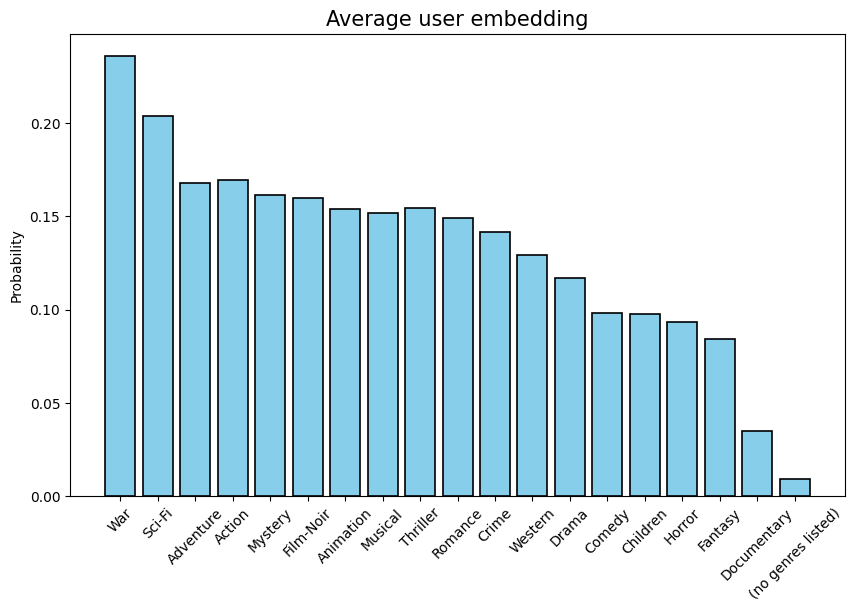

In [341]:
n = 10000

avg = np.zeros(len(priors))
for i in range(n):
    user = User(priors)
    avg += user.embedding

avg /= n

# Plot the result
plt.figure(figsize=(10, 6))
plt.bar(range(len(priors)), avg, color='skyblue', edgecolor='black', linewidth=1.2)
plt.xticks(range(len(priors)), genre_likes.index, rotation=45)
plt.ylabel('Probability')
plt.title('Average user embedding', fontsize=15)
plt.show()

Normalize the components to have an embedding with unitary Euclidean norm: $\boldsymbol{e}_i := \frac{\boldsymbol{e}_i}{||\boldsymbol{e}_i||_2}$

# Movie Quality $L_d$ (Ie et al. 2019)

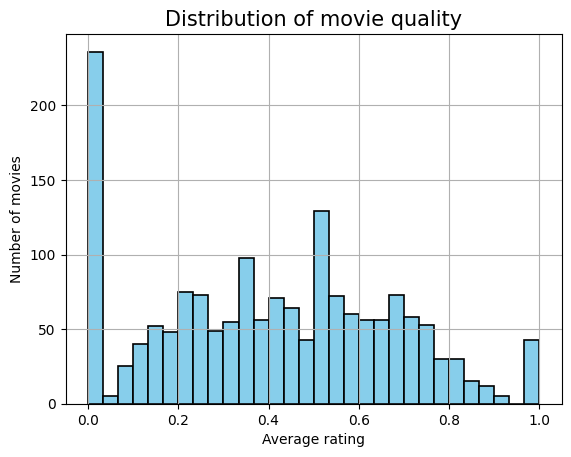

In [342]:
ratings["Good"] = ratings["rating"] >= 4

# Count the average rating per movie based on the "Good" column
average_rating = ratings.groupby("movieId")["Good"].mean()

# for each movie assign its average rating
movies = pd.merge(movies, average_rating, on='movieId')
movies.rename(columns={'Good': 'quality'}, inplace=True)

average_rating.hist(bins=30, color='skyblue', edgecolor='black', linewidth=1.2)

plt.xlabel('Average rating')
plt.ylabel('Number of movies')
plt.title('Distribution of movie quality', fontsize=15)
plt.show()

# Normalizing item embeddings $\boldsymbol{e}_i$

In [343]:
list(genre_likes.index)

['War',
 'Sci-Fi',
 'Adventure',
 'Action',
 'Mystery',
 'Film-Noir',
 'Animation',
 'Musical',
 'Thriller',
 'Romance',
 'Crime',
 'Western',
 'Drama',
 'Comedy',
 'Children',
 'Horror',
 'Fantasy',
 'Documentary',
 '(no genres listed)']

In [346]:
m_list = []
for index, row in movies.iterrows():
    embedding = [row[j] for j in list(genre_likes.index)]
    embedding = normalize_to_unit_euclidean_norm(embedding)
    m_list.append(embedding)

item_embeddings = np.array(m_list)

# save item_embeddings to a npz file 
np.savez_compressed(os.path.join("embeddings", f'{directory}-t.npz'), item_embeddings=item_embeddings)


# save item_embeddings to a npy file
np.save(os.path.join("embeddings", f'{directory}.npy'), item_embeddings)

In [347]:
item_embeddings.shape

(1682, 19)

In [348]:
m_list = []
for index, row in movies.iterrows():
    embedding = [row[j] for j in list(genre_likes.index)]
    embedding = normalize_to_unit_euclidean_norm(embedding)
    quality = row["quality"]
    
    # Combine embedding and quality into a single list
    combined = list(embedding) + [quality]
    
    m_list.append(combined)

item_embeddings = np.array(m_list)

# save item_embeddings to a npz file 
np.savez_compressed(os.path.join("embeddings", f'{directory}_quality.npz'), item_embeddings=item_embeddings)


# save item_embeddings to a npy file
np.save(os.path.join("embeddings", f'{directory}.npy'), item_embeddings)

In [349]:
item_embeddings.shape

(1682, 20)